In [1]:
%load_ext autoreload
from google.auth import default
credentials, project = default()

In [2]:
%autoreload 2
from dotenv import load_dotenv
import importlib
import sys
import os
import pickle
from pathlib import Path
load_dotenv()
# Add the parent directory of 'src' to the Python path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

    
from src.config_loader import config, VoiceManager
from src.gcs_storage import upload_to_gcs, read_from_gcs, get_flashcard_path
from src.images import generate_image

In [ ]:
['story_midnight_garden_mystery',
 'story_workplace_stress_vacation',
 'story_the_marathon']

In [ ]:
read_from_gcs(bucket_name=config.GCS_PRIVATE_BUCKET, file_path=get_flashcard_path("story_unexpected_wedding_guests"))

In [8]:
image = generate_image(prompt="A delicious, decadent cupcake with pink swirl of frosting and a cherry on top, on display at a french bakery counter, a person in the foreground is ordering the cake",
                       style = "bright oil painting")


🎨 Starting image generation process for prompt: A delicious, decadent cupcake with pink swirl of frosting and a cherry on top, on display at a french bakery counter, a person in the foreground is ordering the cake in the style of bright oil painting
📋 Will try providers in order: ['imagen', 'deepai', 'stability']
🔄 Attempting image generation with imagen...
✅ Successfully generated image with imagen
   Prompt: A delicious, decadent cupcake with pink swirl of frosting and a cherry on top, on display at a french bakery counter, a person in the foreground is ordering the cake in the style of bright oil painting


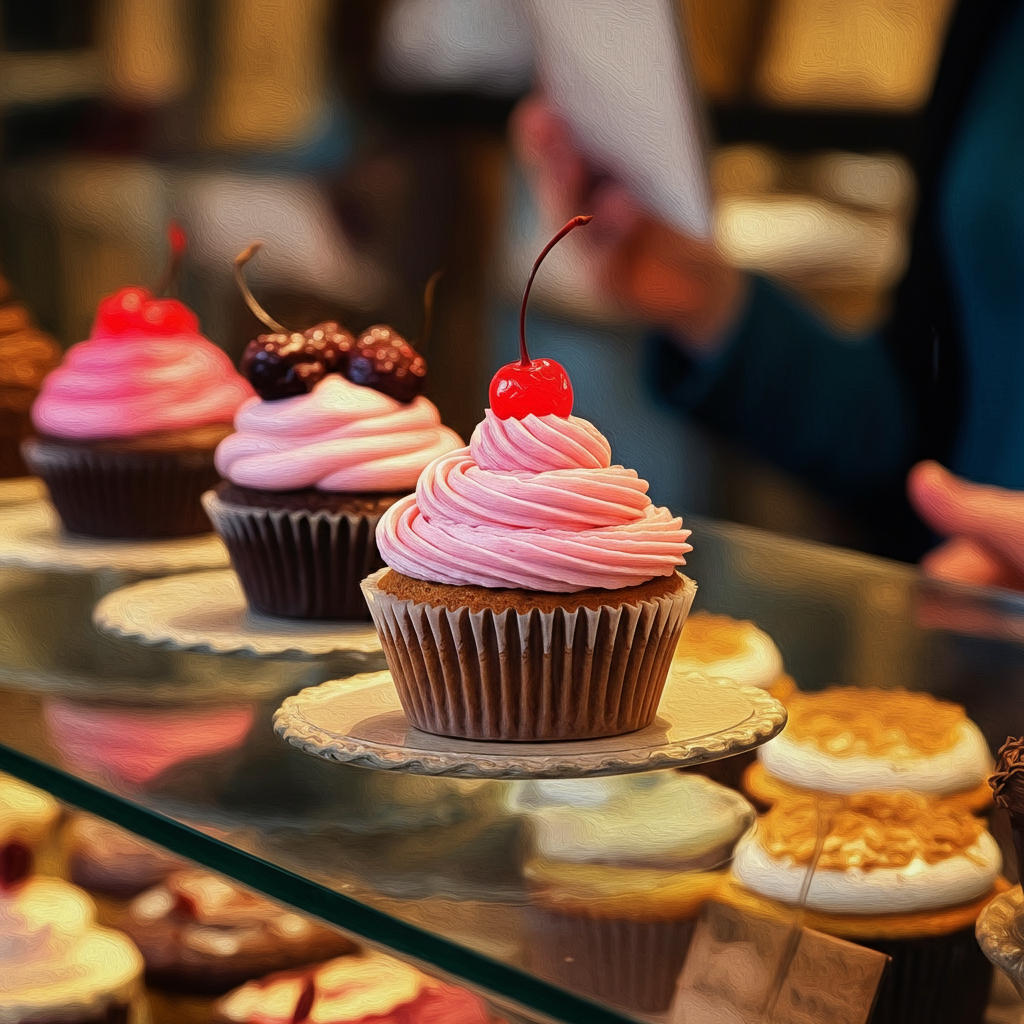

In [9]:
image

In [10]:
upload_to_gcs(image, config.GCS_PRIVATE_BUCKET, file_name = "resources/shopify/images/cupcake_on_display.png")

'gs://audio-language-trainer-private-content/resources/shopify/images/cupcake_on_display.png'

In [ ]:
create_png_of_html("../outputs/test_templates/listening_back.html", 
                   output_path="../outputs/test_templates/listening_back.png",
                   height=1100)

In [11]:
story_phrases2 = [entry['phrase'] for entry in story_collection['story_teaching_music']]

In [9]:
story_phrases = [entry['phrase'] for entry in story_collection['story_midnight_garden_mystery']]

In [ ]:
import subprocess
import re
from typing import List, Tuple

def get_soft_deleted_objects(base_path: str) -> List[Tuple[str, str]]:
    """Get list of soft-deleted objects with their generation numbers."""
    # Check the subfolders: introduction, development, resolution
    subfolders = ['introduction', 'development', 'resolution']
    soft_deleted = []
    
    for subfolder in subfolders:
        # Use the exact GCS path format without trailing slash
        subfolder_path = f"{base_path}/{subfolder}"
        cmd = f"gcloud storage ls {subfolder_path}/* --soft-deleted"
        result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
        
        if result.returncode != 0:
            # Try with recursive flag
            cmd = f"gcloud storage ls -r {subfolder_path} --soft-deleted"
            result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
            
            if result.returncode != 0:
                print(f"Note: Could not list {subfolder_path}")
                continue
        
        # Parse output to find soft-deleted objects (those with generation numbers)
        for line in result.stdout.strip().split('\n'):
            if line and '#' in line and not line.endswith('/'):  # Skip directories
                # Extract the full path with generation and the base path without generation
                match = re.match(r'(gs://[^#]+)#(\d+)', line.strip())
                if match:
                    base_path_obj, generation = match.groups()
                    soft_deleted.append((f"{base_path_obj}#{generation}", base_path_obj))
                    #print(f"Found soft-deleted: {base_path_obj}")
    
    return soft_deleted

def restore_objects(objects: List[Tuple[str, str]]) -> None:
    """Restore soft-deleted objects."""
    for source_with_gen, destination in objects:
        cmd = f"gcloud storage restore {source_with_gen}"
        print(f"Restoring: {source_with_gen}")
        
        result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
        if result.returncode == 0:
            print(f"✓ Successfully restored {source_with_gen}")
        else:
            print(f"✗ Failed to restore {source_with_gen}: {result.stderr}")

# List of story names
stories = [
    'story_sunset_wedding_blues', 'story_better_than_a_movie', 'story_unexpected_wedding_guests',
    'story_workplace_stress_vacation', 'story_the_marathon', 'story_midnight_garden_mystery',
    'story_teaching_music', 'story_job_interview_gone_wrong', 'story_winter_in_sweden',
    'story_a_fishing_trip', 'story_team_spirit', 'story_brussels_blend', 'story_rainy_football_match',
    'story_camping_trip_gone_awry', 'story_unexpected_career_change', 'story_a_missed_stop',
    'story_road_trip', 'story_forgetful_diver', 'story_the_birthday_party', 'story_the_power_cut'
]

# Base bucket path
bucket_base = "gs://audio-language-trainer-private-content/collections/LM1000/french/stories"

# Process each story
all_soft_deleted = []
for story in stories[1:]:
    path = f"{bucket_base}/{story}/audio/french"
    print(f"Checking {story}...")
    
    soft_deleted = get_soft_deleted_objects(path)
    if soft_deleted:
        print(f"Found {len(soft_deleted)} soft-deleted objects in {story}")
        all_soft_deleted.extend(soft_deleted)
    else:
        print(f"No soft-deleted objects found in {story}")

print(f"\nTotal soft-deleted objects found: {len(all_soft_deleted)}")

# Ask for confirmation before restoring
if all_soft_deleted:
    restore_objects(all_soft_deleted)


In [27]:
midnight_garden_phrases = [
    "I just can't understand this complex math problem",
    "We shared our food with the homeless guy",
    "Anyway, let's get back to the main point",
    "Let's look into this matter carefully",
    "Act now, before it's too late!",
    "I tried to hit the target but missed",
    "I tried to catch the last bus home",
    "Would you mind closing the window, please?",
    "Did you hear? The car hit a tree",
    "Make sure you consider all your options first",
    "I'm so happy for you",
    "Please close the door on your way out",
    "Could you hang the picture on the bedroom wall?",
    "Love your neighbors as yourself",
    "I'm letting my hair grow long and wild",
    "Let's help this elderly person cross the street",
    "Don't worry about what others think of you",
    "Did you hear someone knock on the door late at night?",
    "Roll the dice to see who goes first",
    "Did you hear someone knock at the door past midnight?",
    "Don't you think strange things happen in that old house?",
    "Have you noticed how much the region's air quality has improved?",
    "Did you try to guess the correct answer?",
    "Do you think she'll become a famous artist one day?",
    "Did you hear? He hurt himself fixing the roof",
    "I'll call you back later",
    "Just use your common sense here",
    "I'm teaching the new employees tomorrow",
    "They found a dead body behind the club",
    "Did you know they moved to the countryside last year?",
    "I was careful not to show my fear",
    "Did you hear him cough during the quiet moment?",
    "Check the file for any recent changes",
    "Do you want to become a famous writer?",
    "Did you hear that strange noise from upstairs?",
    "I run a mile every morning before work",
    "We don't care if it's a boy or girl",
    "Don't forget to bring the ticket",
    "Don't forget to feed the dog tonight",
    "Don't bother me with such trivial matters",
    "Shall we think of something else?",
    "Do you like playing with your pet cat?",
    "Don't forget to round up the cost to the nearest cent",
    "The company will charge a fair amount",
    "I should phone the doctor for an appointment",
    "Close the window, it's getting cold outside",
    "Should we take a different route?",
    "I bet you can't fit through that hole",
    "The car stops at the next station",
    "He's planning to grow vegetables in his garden"
]

In [28]:
from src.convert import clean_filename

midnight_phrase_keys = [clean_filename(phrase) for phrase in midnight_garden_phrases]








In [29]:
for midnight_phrase_key in midnight_phrase_keys:
    story_id = phrase_to_story_index.get(midnight_phrase_key, "Error with phrase: " + midnight_phrase_key)
    if "Error" in story_id:
        print(story_id)






In [7]:
vm._load_azure_voices("sv-SE")

In [ ]:
story_unexpected_train_adventure

story_a_missed_stop

In [ ]:
df_lm1000

In [ ]:
plot_vocabulary_growth(df_lm1000['EnglishText'])

In [ ]:
get_deck_contents("RapidRetention - Swedish::LM1000")

In [21]:
save_text_file(responses, "../outputs/name_princess.txt")

In [3]:
src_dir = Path().absolute().parent
phrase_dir = src_dir / "data" / "phrases"

p1 = load_text_file(phrase_dir / "longman_1000_phrases.txt")

In [4]:
p2 = load_text_file(phrase_dir / "longman_2000_phrases.txt")

In [3]:
from src.audio_generation import text_to_speech_google, text_to_speech, text_to_speech_azure
voice_models = config.get_voice_models()
voice_model = voice_models[1]

In [ ]:
voice_models

In [ ]:
text = "Hej Sam, hörde du om den nya parken de bygger i centrum?"
aud = text_to_speech(text = text, config_language="target", gender="MALE")
aud

In [ ]:
aud

In [ ]:
aud2 = text_to_speech_azure(text, voice_model)
aud2

In [47]:
from google.cloud import texttospeech

In [49]:
client = texttospeech.TextToSpeechClient()

synthesis_input = texttospeech.SynthesisInput(text=text)

voice = texttospeech.VoiceSelectionParams(
    language_code=voice_model.language_code, name=voice_model.voice_id
)

audio_config = texttospeech.AudioConfig(
    audio_encoding=texttospeech.AudioEncoding.MP3, speaking_rate=1.0
)

response = client.synthesize_speech(
    input=synthesis_input, voice=voice, audio_config=audio_config
)

In [ ]:
response

In [139]:
notebook_dir = Path().absolute() 
story_name = "story_roblox_bot_trouble"
story_dir = notebook_dir.parent / "outputs" / "stories"
story_path = story_dir / f"{story_name}.json"
story_path_pkl = story_dir / story_name / config.TARGET_LANGUAGE_NAME / f"{story_name}.pkl"

In [140]:
story_dict = load_pickle(story_path_pkl)

In [148]:
all_flashcards = load_text_file("../data/phrases/eating_out.txt")

In [ ]:
#sometimes this needs running twice...
from src.anki_tools import add_tag_to_matching_notes
clean_story_name = "story_dining_dilemma_at_local_restaurant"
DECK_NAME = 'RapidRetention - Italian - EatingOut'
updates, errors = add_tag_to_matching_notes(
    deck_name=DECK_NAME,
    phrases=all_flashcards,
    tag=clean_story_name
)

print(f"Updated {updates} notes")
if errors:
    print("Errors encountered:")
    for error in errors:
        print(f"- {error}")

In [25]:
def create_sort_field(order: int, target_text: str) -> str:
    """Create a unique sort field using order and truncated guid.
    
    Args:
        order: Integer for primary sort order (0-9999)
        target_text: The target language text used to generate guid
        
    Returns:
        String like '0001-3f4a9' that will sort correctly in Anki
    """
    guid = string_to_large_int(target_text + "image")
    # Take first 5 chars of hex representation (20 bits)
    truncated_guid = hex(guid)[2:10]
    return f"{order:04d}-{truncated_guid}"

In [ ]:
from src.utils import string_to_large_int
create_sort_field(1, "hello")

In [ ]:
create_html_story(story_data_dict=story_dict,
image_dir = story_dir / story_name,
story_name = story_name
)

In [143]:
html_story_path = story_dir / story_name / config.TARGET_LANGUAGE_NAME / f"{story_name}.html"

In [ ]:
html_story_path

In [ ]:
upload_story_to_gcs(html_story_path)

In [ ]:
generate_index_html()

In [ ]:
# Upload index page to root of bucket
upload_to_gcs(
    "../outputs/stories/index.html",
    bucket_name="audio-language-trainer-stories",
    content_type="text/html"
)

In [ ]:
story_dict = add_audio(story_dict)

In [ ]:
story_dict['introduction']['translated_dialogue_audio_fast']

In [7]:
from src.utils import save_pickle
save_pickle(story_dict, story_path_pkl)

In [4]:
from src.utils import load_pickle

story_dict = load_pickle(story_path_pkl)

In [ ]:
from src.images import generate_and_save_story_images
    
image_data = generate_and_save_story_images(story_dict=story_dict, output_dir = story_dir, story_name=story_name)


In [8]:
from PIL import Image

album_image = Image.open("..\data\stories\story_community_park\story_community_park_introduction.png")


In [ ]:
#create m4a file:
from src.story import create_album_files

create_album_files(story_data_dict=story_dict, cover_image=album_image, output_dir=story_dir / config.TARGET_LANGUAGE_NAME, story_name=story_name)


In [12]:
from src.utils import create_test_story_dict
test_dict = create_test_story_dict(story_dict, 2, 0,2, 0.1)

In [ ]:
%autoreload 2
from src.story import create_html_story

create_html_story(
            story_dict,
            story_dir,
            component_path="../src/StoryViewer.js",
            story_name=story_name,
        )

In [23]:
html_story_path = story_dir / config.TARGET_LANGUAGE_NAME / f"{story_name}.html"

In [8]:
assert html_story_path.exists()

In [ ]:
upload_to_gcs(html_file_path=html_story_path)

In [ ]:
compare_vocab_overlap(test_vocab_dict, vocab_used)

In [ ]:
# Create index once - to retrieve matching flashcards that already exist
from src.nlp import create_flashcard_index, get_matching_flashcards_indexed

flashcard_index = create_flashcard_index(phrases)


In [ ]:
save_json(flashcard_index, "test_flashcard_index.json")


In [ ]:

# Use indexed version for faster matching
results = get_matching_flashcards_indexed(vocab_used, flashcard_index)

In [ ]:
proposed_flashcard_phrases = [card.get('phrase') for card in results['selected_cards']]
vocab_from_flashcards = get_vocab_dictionary_from_phrases(proposed_flashcard_phrases)

In [ ]:
compare_vocab_overlap(vocab_used, vocab_from_flashcards)

In [7]:
style_mapping = {
    # General illustration styles
    "watercolor": "watercolor illustration style, fluid brush strokes, soft color transitions, vibrant pigments, organic textures, white paper showing through, loose expressive style, dynamic washes",
    "oil_painting": "oil painting style, rich impasto textures, visible brushstrokes, saturated colors, warm undertones, glazed layers, painterly details",
    "childrens_book": "children's book illustration style, clean linework, bright cheerful colors, decorative details, playful shapes, gentle shading, hand-drawn feel",
    "ghibli": "Studio Ghibli art style, soft atmospheric colors, detailed backgrounds, gentle gradients, natural elements, dreamy lighting, painted textures",
    "modern_animation": "modern animation art style, clean vector-like shapes, bold color palette, subtle textures, smooth gradients, graphic design elements, minimalist details",
    "gouache": "gouache painting style, matte finish, bold flat colors, painterly textures, crisp edges, vintage poster feel, decorative elements",
    
    # Cultural and country-specific styles
    "spanish": "Spanish Golden Age painting style, with Sorolla's Mediterranean light, bold shadows, warm earth tones, dramatic lighting like Velázquez, Gaudí's organic forms",
    "chinese": "Chinese ink wash painting style (水墨画), ethereal mountain mists, flowing brushstrokes, elegant simplicity, vertical composition, Song Dynasty aesthetic",
    "japanese": "Ukiyo-e woodblock print style, bold outlines, flat color blocks, decorative patterns, Hokusai-style waves, traditional Japanese composition",
    "german": "German Expressionism style with Bauhaus elements, angular shapes, bold primary colors, Kandinsky-like geometric elements, strong contrasts",
    "french": "French Impressionism meets Art Nouveau, soft diffused light, Mucha-style decorative elements, pastoral scenes, elegant curves",
    "italian": "Italian Renaissance style with Futurist energy, Botticelli-like figures, golden ratio composition, perfect perspective, classical forms, dynamic movement",
    "korean": "Korean Minhwa folk art style, symbolic tigers, vibrant colors, decorative clouds, flat perspective, traditional motifs",
    "russian": "Russian Constructivism meets Icon painting, bold geometric shapes, reverse perspective, icon-like gold details, strong compositional elements",
    "arabic": "Islamic art style with geometric patterns, arabesque details, rich jewel tones, calligraphy-inspired lines, complex geometry",
    "hindi": "Madhubani folk art style mixed with Mughal miniature, detailed patterns, symbolic motifs, traditional earth colors, intricate borders",
    "portuguese": "Portuguese Azulejo tile art style, blue and white patterns, maritime motifs, Manueline decorative elements",
    "vietnamese": "Đông Hồ folk art style, bold simple forms, traditional red and black colors, woodblock print effect, symbolic elements",
    "turkish": "Turkish Ebru art style with Ottoman miniature elements, swirling marbled patterns, Ottoman architectural details, traditional motifs",
    "polish": "Polish Wycinanki style, symmetrical folk patterns, paper cut effect, bold colors, traditional folk motifs",
    "hebrew": "Jewish paper cut art meets Bezalel school style, flowing organic patterns, symbolic elements, Art Nouveau influence, intricate patterns",
    "thai": "Thai temple painting style, golden details, flat perspective, flowing lines, traditional patterns, rich colors",
    "greek": "Greek art style combining Byzantine icons and ancient vase painting, red-figure technique, Byzantine gold backgrounds, classical motifs",
    "swedish": "Swedish Kurbits folk art style, folk floral patterns, bright traditional colors, symmetrical designs, decorative elements",
    "dutch": "Dutch Golden Age style meets De Stijl, Vermeer-like light, clean compositions, rich details, geometric modernism",
    "indonesian": "Wayang kulit shadow puppet art style, intricate cutout effect, traditional pattern work, detailed ornamentation, shadow play aesthetic"
}

# Save to JSON file
from src.utils import save_json
save_json(style_mapping, Path().absolute().parent / "src" / "art_styles.json")

In [ ]:
results['remaining_vocab']

In [ ]:
matching_phrases = get_matching_flashcards(vocab_used, phrases)

1. Generate story from broad Longman vocabulary pool
story = generate_story_from_vocab(longman_vocab_dict)

2. Extract all vocabulary used in story
story_vocab = extract_vocab_from_story(story)

3. Compare with Longman dictionary to identify source
used_vocab = compare_vocab_overlap(longman_vocab_dict, story_vocab)

4. get existing flashcards we already have
5. generate new ones
. Generate flashcards for:
    - All story vocabulary that appears in Longman list
    - Common connecting words needed for natural speech
    - Tag cards with which story they appear in
flashcards = generate_flashcards_for_story(story_vocab, story_id)

In [ ]:
from pydub import AudioSegment

In [ ]:
AudioSegment.silent(100)


In [ ]:
vm._load_google_voices("fr-FR")

In [ ]:
vm.voices

In [ ]:

import azure.cognitiveservices.speech as speechsdk
locale="fr-FR"
language_object = Language.get(locale)
speech_key = os.getenv("AZURE_API_KEY")
if not speech_key:
    print("Warning: AZURE_API_KEY not found in environment variables")



In [ ]:


service_region = os.getenv("AZURE_REGION", "eastus")
speech_config = speechsdk.SpeechConfig(
    subscription=speech_key, region=service_region
)
speech_synthesizer = speechsdk.SpeechSynthesizer(
    speech_config=speech_config
)

result = speech_synthesizer.get_voices_async(locale=locale).get()


In [ ]:
voice = result.voices[0]

In [ ]:
voice.local_name

In [ ]:
voice = result.voices[0]


In [ ]:
voice.voice_type._name_

In [ ]:
all

In [ ]:
all = []
for voice in result.voices:
    voice_type = (
        VoiceType.NEURAL
        if voice.voice_type._name_ == "OnlineNeural"
        else VoiceType.STANDARD
    )

    voice_info = VoiceInfo(
        name=voice.local_name,
        provider=VoiceProvider.AZURE,
        voice_type=voice_type,
        gender=voice.gender._name_.upper(),
        language_code=voice.locale,
        country_code=language_object.territory,
        voice_id=voice.short_name,
    )

    all.append(voice_info)



In [ ]:
vm._load_azure_voices("fr-FR")

In [ ]:
from google.cloud import texttospeech

client = texttospeech.TextToSpeechClient()
response = client.list_voices(language_code="fr-FR")

In [ ]:
response.voices[2]

In [ ]:
lang.is_valid()

In [ ]:
lang.territory_name()

In [ ]:
lang.language_name()

In [ ]:
from src.translation import translate_from_english

In [ ]:
translate_from_english("hello", "cmn-TW")

In [ ]:
config._load_config()

In [ ]:
config.get_voice_models()

In [ ]:
config.voice_manager._load_azure_voices("fr-FR")
config.voice_manager.voices

In [ ]:
config.voice_manager._lazy_load_voices()

In [ ]:
config.voice_manager.voices

In [ ]:
reader = AnkiCollectionReader(ANKI_PATH)

In [ ]:
reader.close()

In [ ]:
stats = reader.col.stats()

In [ ]:
stats.

In [ ]:
config._load_config()

In [ ]:
import time
from collections import defaultdict
import pandas as pd

def calculate_knowledge_score(collection_path: str, deck_name: str) -> pd.DataFrame:
    """
    Calculate a knowledge score (0-1) for each card in the deck based on review history.
    
    Factors considered:
    - Current interval (longer intervals suggest better knowledge)
    - Ease factor (higher ease suggests better retention)
    - Review success rate (ratio of Good/Easy vs Again buttons)
    - Time since last review (recent successful reviews weighted more)
    - Review time trends (decreasing review times suggest familiarity)
    
    Args:
        collection_path: Path to the .anki2 collection file
        deck_name: Name of the deck to analyze
    
    Returns:
        dict: Card IDs mapped to their knowledge scores and contributing factors
    """
    
    
    scores = {}
    with AnkiCollectionReader(collection_path) as reader:
        # Get deck ID
        deck = reader.col.decks.by_name(deck_name)
        if not deck:
            raise ValueError(f"Deck '{deck_name}' not found")
            
        # Get all cards in deck
        card_ids = reader.col.find_cards(f"did:{deck['id']}")
        
        # For each card, analyze its review history
        for card_id in card_ids:
            card = reader.col.get_card(card_id)
            note = reader.col.get_note(card.nid)
            
            # Get review logs for this card
            reviews = reader.col.db.all(
                "SELECT ease, ivl, factor, time, type FROM revlog WHERE cid = ? ORDER BY id",
                card_id
            )
            
            if not reviews:
                scores[card_id] = {
                    'score': 0,
                    'reason': 'No reviews yet',
                    'note_fields': dict(note.items())
                }
                continue
                
            # Calculate component scores
            
            # 1. Interval score (0-0.4): Longer intervals suggest better knowledge
            max_interval = 365  # Cap at 1 year for scoring
            current_interval = abs(card.ivl)  # Use absolute value to handle negative intervals
            interval_score = min(current_interval / max_interval, 1) * 0.4
            
            # 2. Ease score (0-0.2): Higher ease factors suggest better retention
            min_ease = 1300  # Minimum ease factor
            max_ease = 3100  # Maximum ease factor
            ease_score = (card.factor - min_ease) / (max_ease - min_ease) * 0.2
            ease_score = max(0, min(ease_score, 0.2))  # Clamp between 0-0.2
            
            # 3. Review success score (0-0.3)
            success_count = sum(1 for r in reviews if r[0] >= 3)  # Count Good/Easy
            total_reviews = len(reviews)
            success_score = (success_count / total_reviews) * 0.3 if total_reviews > 0 else 0
            
            # 4. Review time trend score (0-0.1)
            # Lower and/or decreasing review times suggest familiarity
            if len(reviews) >= 3:
                recent_times = [r[3] for r in reviews[-3:]]  # Last 3 review times
                avg_time = sum(recent_times) / len(recent_times)
                time_score = min(1, max(0, (30000 - avg_time) / 30000)) * 0.1  # Scale around 30s
            else:
                time_score = 0
                
            # Calculate final score
            final_score = interval_score + ease_score + success_score + time_score
            
            # Store results
            scores[card_id] = {
                'score': round(final_score, 3),
                'components': {
                    'interval_score': round(interval_score, 3),
                    'ease_score': round(ease_score, 3),
                    'success_score': round(success_score, 3),
                    'time_score': round(time_score, 3)
                },
                'stats': {
                    'current_interval': current_interval,
                    'ease_factor': card.factor,
                    'review_success_rate': round(success_count / total_reviews, 2) if total_reviews > 0 else 0,
                    'total_reviews': total_reviews
                },
                'note_fields': dict(note.items())
            }
    
    # Convert to DataFrame
    rows = []
    for card_id, data in scores.items():
        row = {
            'card_id': card_id
        }
        
        # Add note fields
        row.update(data['note_fields'])
        
        # Add component scores
        if 'components' in data:
            row.update(data['components'])
        
        # Add statistics
        if 'stats' in data:
            row.update(data['stats'])
        
        # Add final score
        row['knowledge_score'] = data['score']
        
        rows.append(row)
    
    df = pd.DataFrame(rows)
    
    # Reorder columns to have card_id first, then content fields, then scores
    score_cols = ['interval_score', 'ease_score', 'success_score', 'time_score', 'knowledge_score']
    stat_cols = ['current_interval', 'ease_factor', 'review_success_rate', 'total_reviews']
    content_cols = [col for col in df.columns if col not in score_cols + stat_cols + ['card_id']]
    
    df = df[['card_id'] + content_cols + stat_cols + score_cols]
    
    return df

def print_knowledge_scores(scores: dict, num_examples: int = 5):
    """
    Print formatted knowledge scores with examples of high and low scoring cards.
    
    Args:
        scores: Dictionary of scores from calculate_knowledge_score()
        num_examples: Number of high/low scoring examples to show
    """
    # Calculate overall statistics
    all_scores = [s['score'] for s in scores.values()]
    avg_score = sum(all_scores) / len(all_scores) if all_scores else 0
    
    print(f"Analysis of {len(scores)} cards:")
    print(f"Average knowledge score: {avg_score:.3f}")
    print(f"Score distribution:")
    
    # Show score distribution
    ranges = [(0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0)]
    for low, high in ranges:
        count = sum(1 for s in all_scores if low <= s < high)
        print(f"{low:.1f}-{high:.1f}: {count} cards ({count/len(all_scores)*100:.1f}%)")
    
    # Show examples of highest and lowest scoring cards
    sorted_scores = sorted(scores.items(), key=lambda x: x[1]['score'])
    
    print(f"\nLowest {num_examples} scoring cards:")
    for card_id, data in sorted_scores[:num_examples]:
        print(f"\nCard ID: {card_id}")
        print(f"Score: {data['score']:.3f}")
        if 'components' in data:
            print("Score components:")
            for component, value in data['components'].items():
                print(f"  {component}: {value:.3f}")
        print("Content:")
        for field, content in data['note_fields'].items():
            # Truncate long content for display
            content_preview = content[:100] + "..." if len(content) > 100 else content
            print(f"  {field}: {content_preview}")
    
    print(f"\nHighest {num_examples} scoring cards:")
    for card_id, data in sorted_scores[-num_examples:]:
        print(f"\nCard ID: {card_id}")
        print(f"Score: {data['score']:.3f}")
        if 'components' in data:
            print("Score components:")
            for component, value in data['components'].items():
                print(f"  {component}: {value:.3f}")
        print("Content:")
        for field, content in data['note_fields'].items():
            # Truncate long content for display
            content_preview = content[:100] + "..." if len(content) > 100 else content
            print(f"  {field}: {content_preview}")

# Example usage:
# scores = calculate_knowledge_score("path/to/collection.anki2", "My Deck")
# print_knowledge_scores(scores)

In [ ]:
df = calculate_knowledge_score(ANKI_PATH, "RapidRetention - Swedish - LM1000")

# View summary statistics


In [ ]:

# Sort by knowledge score
df.groupby("EnglishText").agg({"knowledge_score" : "mean"}).sort_values(by="knowledge_score", ascending=False).head(60)

In [ ]:
extract_vo

In [ ]:
length_phrase = "4-5 words long, but treat common lexical chunks (I'm going to.., Do you.., Let us.. etc) as a single word"
verbs_per_phrase = "one verb (but OK for an additional adverb if required)"
gcse_phrases = generate_phrases_from_vocab_dict(vocab_dict=gcse_vocab, max_iterations=1)

In [ ]:
gcse_phrases

In [ ]:
vm._lazy_load_voices()

In [ ]:
persian_text = "سلام دنیا"
aud = slow_text_to_speech(persian_text, config_language="target", gender="MALE")

In [ ]:
aud

In [ ]:
_remove_within_brackets("falling (over)")

In [ ]:
import csv
from typing import List, Tuple, Dict, Set
from dataclasses import dataclass
from collections import defaultdict
from src.phrase import generate_phrases_from_vocab_dict

@dataclass
class ProcessingResult:
    pairs: List[Tuple[str, str]]
    problem_lines: Dict[int, str]  # line number -> original line content
    skipped_lines: Dict[int, str]  # line number -> reason for skipping

def process_anki_file(file_path: str) -> ProcessingResult:
    """
    Process tab-separated Anki export data from a file and pair up variations.
    If there are more English variations than French, repeat the French term.
    
    Args:
        file_path: Path to the tab-separated text file
        
    Returns:
        ProcessingResult containing:
        - processed pairs
        - dictionary of problem lines
        - dictionary of skipped lines
    """
    result = []
    problem_lines = {}
    skipped_lines = {}
    
    # Read and process the file
    with open(file_path, 'r', encoding='utf-8') as f:
        for line_num, line in enumerate(f, 1):
            # Skip empty lines and comments
            line = line.strip()
            if not line:
                skipped_lines[line_num] = "Empty line"
                continue
            if line.startswith('#'):
                skipped_lines[line_num] = "Comment line"
                continue
                
            # Split line into columns
            columns = line.split('\t')
            if len(columns) < 2:
                skipped_lines[line_num] = "Insufficient columns"
                continue
                
            french_terms = columns[0].strip()
            english_terms = columns[1].strip()
            
            # Split variations
            french_variations = [term.strip() for term in french_terms.split('/')]
            english_variations = [term.strip() for term in english_terms.replace('/', ',').split(',')]
            
            # If there are more English variations than French ones
            if len(french_variations) < len(english_variations):
                if len(french_variations) == 1:  # If there's only one French term, repeat it
                    french_term = french_variations[0]
                    # Filter out 'i.e.' from English variations
                    english_variations = [eng for eng in english_variations if eng.lower() != 'i.e.']
                    # Create pairs with repeated French term
                    for eng in english_variations:
                        if eng:  # Only add if English term is non-empty
                            result.append((french_term, eng))
                else:
                    # If multiple French terms but still fewer than English, record problem
                    problem_lines[line_num] = line
                    print(f"\nWARNING - Complex mismatch on line {line_num}:")
                    print(f"French variations ({len(french_variations)}): {french_variations}")
                    print(f"English variations ({len(english_variations)}): {english_variations}")
            else:
                # Normal case where French variations >= English variations
                for fr, eng in zip(french_variations, english_variations):
                    if fr and eng:  # Only add if both terms are non-empty
                        result.append((fr, eng))
    
    return ProcessingResult(pairs=result, problem_lines=problem_lines, skipped_lines=skipped_lines)


processed_data = process_anki_file(file_path)



In [ ]:
def categorize_word_pairs(pairs: List[Tuple[str, str]]) -> Dict[str, Set[Tuple[str, str]]]:
    """
    Categorize word pairs into verbs and vocab based on English 'to ' prefix.
    
    Args:
        pairs: List of tuples containing (french_word, english_word)
        
    Returns:
        Dictionary with 'verbs' and 'vocab' keys containing sets of (french, english) pairs
    """
    vocab_dict = {
        'verbs': set(),
        'vocab': set()
    }
    
    for french, english in pairs:
        # Clean up any trailing/leading whitespace
        french = french.strip()
        english = english.strip()
        
        # Check if it's a verb (starts with 'to ')
        if english.lower().startswith('to ') | english.lower().startswith('to be '):
            # Remove 'to ' and add to verbs
            english_cleaned = english[3:].strip()  # Remove 'to ' prefix
            vocab_dict['verbs'].add(english_cleaned)
        else:
            # Add to vocab
            vocab_dict['vocab'].add(english)
    
    vocab_dict['vocab'] = list(vocab_dict['vocab'])
    vocab_dict['verbs'] = list(vocab_dict['verbs'])
    return vocab_dict

In [ ]:
gcse_dict = categorize_word_pairs(processed_data.pairs)

In [ ]:
from src.utils import save_json


save_json(gcse_dict, "../outputs/gcse_dict.json")

In [ ]:
some_phrases = generate_phrases_from_vocab_dict(gcse_dict, 1)

In [ ]:
some_phrases

In [ ]:
speech_key

In [ ]:
import os
import json
import azure.cognitiveservices.speech as speechsdk
from dotenv import load_dotenv
load_dotenv()
# Configure speech service
speech_key = os.getenv("AZURE_API_KEY")
service_region = "eastus"  # Default region
speech_config = speechsdk.SpeechConfig(subscription=speech_key, region=service_region)
speech_synthesizer = speechsdk.SpeechSynthesizer(speech_config=speech_config)

# Get available voices
result = speech_synthesizer.get_voices_async().get()



In [ ]:
vars(voice)

In [ ]:
for voice in result.voices:
    print(voice._short_name)

In [ ]:
for voice in result.voices:
    print(voice.)

In [ ]:
import os
import azure.cognitiveservices.speech as speechsdk
from IPython.display import Audio
import io

# Configure speech service
speech_key = os.getenv("AZURE_API_KEY")
service_region = "eastus"
speech_config = speechsdk.SpeechConfig(subscription=speech_key, region=service_region)

# Note: the voice setting will not overwrite the voice element in input SSML.
speech_config.speech_synthesis_voice_name = "en-US-AmberNeural"

text = "Hello World!"

# use the default speaker as audio output.
speech_synthesizer = speechsdk.SpeechSynthesizer(speech_config=speech_config)

result = speech_synthesizer.speak_text_async(text).get()
# Check result
if result.reason == speechsdk.ResultReason.SynthesizingAudioCompleted:
    print("Speech synthesized for text [{}]".format(text))
elif result.reason == speechsdk.ResultReason.Canceled:
    cancellation_details = result.cancellation_details
    print("Speech synthesis canceled: {}".format(cancellation_details.reason))
    if cancellation_details.reason == speechsdk.CancellationReason.Error:
        print("Error details: {}".format(cancellation_details.error_details))



In [ ]:
from src.audio_generation import play_audio

display(Audio(result.audio_data, autoplay=True))

In [ ]:
# # Load environment variables from .env file
# load_dotenv()
# #from src.config_loader import config
# from src.utils import create_html_story, create_test_story_dict, load_json
# from src.audio_generation import text_to_speech
# from src.translation import tokenize_text
# from src.anki_tools import generate_wiktionary_links
from src.nlp import filter_matching_phrases
from src.utils import load_json


In [ ]:
import json


with open("../data/gcse_vocab_list_cambridge.json", "r") as gcse:
    gcse_dict = json.load(gcse)

In [ ]:
with open("../data/longman_phrases_convo_1000.txt", "r") as core:
    core_phrases = [line.strip("\n") for line in core.readlines()]


In [ ]:
gcse_phrases = filter_matching_phrases(core_phrases, gcse_dict)

In [ ]:
gcse_phrases

In [ ]:
image_dict = load_json("..\data\longman_phrase_images\phrase_image_dict.json")

In [ ]:
phrases = []
for key in image_dict:
    if isinstance(image_dict.get(key), str):
        continue
    else:
        phrases.append(image_dict[key]['phrase'])

In [ ]:
phrases

In [ ]:
import random


test_phrases = random.sample(phrases, 50)

In [ ]:
import json
import os
from pathlib import Path

def merge_json_files(directory_path):
    """
    Merge multiple JSON files containing transformed phrases into a single JSON file,
    removing duplicates based on both original and conversational fields.
    
    Args:
        directory_path (str): Path to the directory containing JSON files
        
    Returns:
        dict: Merged dictionary containing unique transformed phrases
    """
    # Use a set to track unique phrases (as tuples of original and conversational)
    unique_phrases = set()
    all_phrases = []
    
    # Convert directory path to Path object
    dir_path = Path(directory_path)
    
    # Counter for tracking statistics
    total_phrases = 0
    
    # Iterate through all JSON files in the directory
    for json_file in dir_path.glob('*.json'):
        try:
            with open(json_file, 'r', encoding='utf-8') as f:
                data = json.load(f)
                
                # Extract transformed_phrases from each file
                if 'transformed_phrases' in data:
                    phrases = data['transformed_phrases']
                    total_phrases += len(phrases)
                    
                    # Process each phrase
                    for phrase in phrases:
                        # Create tuple of the phrase fields for uniqueness checking
                        phrase_tuple = (phrase['original'], phrase['conversational'])
                        
                        # Only add if we haven't seen this combination before
                        if phrase_tuple not in unique_phrases:
                            unique_phrases.add(phrase_tuple)
                            all_phrases.append(phrase)
                else:
                    print(f"Warning: 'transformed_phrases' not found in {json_file}")
                    
        except json.JSONDecodeError:
            print(f"Error: Could not parse JSON from {json_file}")
        except Exception as e:
            print(f"Error processing {json_file}: {str(e)}")
    
    # Create merged dictionary
    merged_data = {
        "transformed_phrases": all_phrases
    }
    
    # Save merged data to a new JSON file
    output_path = dir_path / 'merged_phrases.json'
    with open(output_path, 'w', encoding='utf-8') as f:
        json.dump(merged_data, f, indent=2, ensure_ascii=False)
    
    # Print statistics
    duplicates = total_phrases - len(all_phrases)
    print(f"Processing complete:")
    print(f"- Total phrases processed: {total_phrases}")
    print(f"- Unique phrases: {len(all_phrases)}")
    print(f"- Duplicates removed: {duplicates}")
    print(f"Output saved to: {output_path}")
    
    return merged_data

In [ ]:
merged_dat = merge_json_files("../outputs/phrase_changes")

In [ ]:
def save_conversational_phrases(transformed_phrases, output_file:str ="../data/longman_phrases_convo_1000.txt") -> None:
    """
    Extract and save conversational phrases to a text file.
    
    Args:
        transformed_phrases: List of dictionaries containing 'original' and 'conversational' phrases
        output_file: Path to the output text file
        
    Prints summary of the operation.
    """
    try:
        with open(output_file, 'w', encoding='utf-8') as f:
            for phrase_pair in transformed_phrases:
                f.write(phrase_pair['conversational'] + '\n')
                
        # Count phrases saved
        phrase_count = len(transformed_phrases)
        print(f"\nOperation Summary:")
        print(f"Successfully saved {phrase_count} phrases to {output_file}")
        
    except Exception as e:
        print(f"Error saving phrases to {output_file}: {str(e)}")
        raise

In [ ]:
save_conversational_phrases(merged_dat["transformed_phrases"])

In [ ]:
import os
import shutil
from typing import Dict, List
from src.utils import clean_filename

def copy_rename_phrase_images(transformed_phrases: List[Dict[str, str]], image_dir: str="..\data\longman_phrase_images") -> None:
    """
    Copy and rename image files based on transformed phrases.
    
    Args:
        transformed_phrases: List of dictionaries containing 'original' and 'conversational' phrases
        image_dir: Directory containing the image files
        
    Prints summary of operations and lists any missing original images.
    """
    successful_copies = 0
    missing_originals = []
    
    # Ensure image directory exists
    if not os.path.exists(image_dir):
        raise FileNotFoundError(f"Image directory not found: {image_dir}")
        
    for phrase_pair in transformed_phrases:
        original_phrase = phrase_pair['original']
        conversational_phrase = phrase_pair['conversational']
        
        # Generate filenames
        original_filename = clean_filename(original_phrase) + '.png'
        new_filename = clean_filename(conversational_phrase) + '.png'
        
        original_path = os.path.join(image_dir, original_filename)
        new_path = os.path.join(image_dir, new_filename)
        
        # Check if original file exists
        if not os.path.exists(original_path):
            missing_originals.append(original_phrase)
            continue
            
        # Skip if destination file already exists
        if os.path.exists(new_path):
            print(f"Warning: Destination file already exists, skipping: {new_filename}")
            continue
            
        try:
            # Copy the file
            shutil.copy2(original_path, new_path)
            successful_copies += 1
        except Exception as e:
            print(f"Error copying {original_filename} to {new_filename}: {str(e)}")
            
    # Print summary
    print("\nOperation Summary:")
    print(f"Successfully copied and renamed: {successful_copies} images")
    print(f"Missing original images: {len(missing_originals)}")
    
    if missing_originals:
        print("\nMissing original images for these phrases:")
        for phrase in missing_originals:
            print(f"- {phrase}")
            
    return successful_copies, missing_originals

In [ ]:
successful_copies, missing_originals = copy_rename_phrase_images(merged_dat['transformed_phrases'])

In [ ]:
def next_phrase_chunk():
    for index in range(0,len(phrases), 50):
        yield phrases[index:index+50]

phrase_iter= next_phrase_chunk()

In [ ]:
next(phrase_iter)

In [ ]:
prompt = f"""Transform each sentence into a more natural, conversational phrase. Each original phrase has an associated teaching image, so the core situation and meaning MUST remain identical. Your response should be a valid JSON object with this structure:

{{
  "transformed_phrases": [
    {{
      "original": "<original phrase>",
      "conversational": "<transformed phrase>"
    }}
  ]
}}

Rules for transformation:

1. Keep ALL key vocabulary from the original (nouns, verbs, adjectives) - as these phrases are for learning that vocab

2. Maintain the EXACT same situation/scene as the original, since it matches an existing image

3. Transform into the most natural way someone would express this idea in conversation, mainly replace phrases that are narrative and passive. Replace with:

   - Imperative ("Don't be late...")
   - Simple statements ("The traffic was terrible...")
   - First-person expressions ("I enjoy...")
   - Questions ("Shall we...?", "Do you ...?", "Did they...?" etc)
4. Keep the original phrase if a change isn't required or modifying the phrase would result in something unnatural sounding

Examples:

{{
"original": "We watched the sunrise over the mountains",
"conversational": "We watched the sunrise over the mountains"
}},
{{
"original": "She will call you as soon as possible",
"conversational": "She will call you as soon as possible"
}},
{{
"original": "They joined the protest against high taxes",
"conversational": "Did you join the protest against high taxes?"
}},
{{
"original": "He will receive an award for his work",
"conversational": "I'm receiving an award for my work"
}},
{{
"original": "She likes to play with her pet cat",
"conversational": "Do you like playing with your pet cat?"
}},
{{
"original": "He covered his face with his hands",
"conversational": "Cover your face with your hands"
}},

Here are the phrases to transform:

{next(phrase_iter)}

Output only valid JSON following the structure above."""

pyperclip.copy(prompt)

In [ ]:
import pyperclip
pyperclip.copy(prompt)

In [ ]:
[image_dict.get(key).get('phrase', '') for key in image_dict]

In [ ]:
resp = tokenize_text("hello world", language_code="en")

In [ ]:
resp = generate_wiktionary_links("こんにちは世界", "Japanese", "ja")

In [ ]:
resp

In [ ]:
audio_segment = slow_text_to_speech(
        text="let's speak slowly and clearly",
    )

In [ ]:
audio_segment

In [ ]:
from src.audio_generation import slow_text_to_speech
from IPython.display import Audio
import io

# Test cases with languages, voice names, and potential issues
test_phrases = [
    # English with apostrophes
    ("I can't believe it!", "en-GB", "en-GB-Wavenet-D"),
    ("Don't you'll I'm they're", "en-GB", "en-GB-Wavenet-D"),
    
    # HTML entities that might appear
    ("Let&#39;s go &amp; have fun!", "en-US", "en-US-Wavenet-D"),
    
    # Italian with apostrophes
    ("L'italiano è bellissimo", "it-IT", "it-IT-Wavenet-A"),
    
    # Japanese (no apostrophes but needs tokenization)
    ("私は日本語を勉強しています", "ja-JP", "ja-JP-Wavenet-B"),
    
    # Chinese test
    ("我正在学习中文", "zh-CN", "cmn-CN-Wavenet-A"),
    
]

# Test each phrase and play the audio
for text, lang_code, voice in test_phrases[0:2]:
    print(f"\nTesting: {text}")
    print(f"Language: {lang_code}")
    print(f"Voice: {voice}")
    
    audio_segment = slow_text_to_speech(
        text, 
        language_code=lang_code,
        voice_name=voice
    )
    
    # Convert to format playable in notebook
    buffer = io.BytesIO()
    audio_segment.export(buffer, format="wav")
    buffer.seek(0)
    
    # Display audio player
    display(Audio(buffer.read(), rate=audio_segment.frame_rate))

In [ ]:
clipper = EnhancedSSMLClipper(
    word_rate="0.85",    # Very slow
    word_pitch="-1st",   # Slightly lower
    break_time="300ms",  # Longer breaks
)



In [ ]:
# Russian text: "Hello! How are you? I am learning Russian."
russian_text = "Здравствуйте! Как дела? Я изучаю русский язык."

# Russian neural voice name
russian_voice = "ru-RU-Standard-B"  # Female voice
clipper.synthesize_speech(russian_text, "enhanced.mp3", russian_voice)

In [ ]:
audio = text_to_speech(russian_text, "ru", russian_voice)

In [ ]:
italian_voice = "it-IT-Neural2-C"
italian_text1 = "Buongiorno! Come stai? Oggi vado in spiaggia."
clipper.synthesize_speech(italian_text1, "enhanced.mp3", italian_voice)

In [ ]:
from src.anki_tools import generate_wiktionary_links_non_english


def test_wiktionary_links():
    """Test function to demonstrate usage."""
    test_cases = [
        ("goodbye England", "uk"),  # Ukrainian
        ("book reading", "sv"),  # Swedish
        ("coffee shop", "ja"),  # Japanese
    ]
    
    for phrase, lang_code in test_cases:
        print(f"\nTesting {lang_code} Wiktionary links for: {phrase}")
        result = generate_wiktionary_links_non_english(phrase, lang_code)
        print(f"Result: {result}")

In [ ]:
config.target_language_voice_models["language_code"]